In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [21]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(x)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_


n_clusters_ = 4

In [22]:
n_clusters_

4

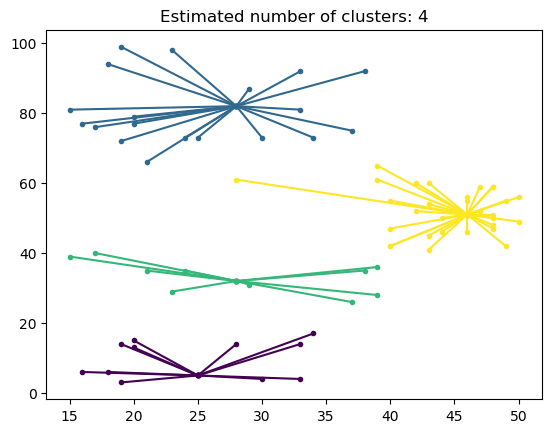

In [23]:

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = x[cluster_centers_indices[k]]
    plt.scatter(
        x[class_members, 0], x[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for z in x[class_members]:
        plt.plot(
            [cluster_center[0], z[0]], [cluster_center[1], z[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


In [25]:

y_af=af.fit_predict(x)

In [26]:
y_af

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [27]:
supervised=pd.DataFrame(dataset)

In [28]:

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
supervised['Cluster_grp']=y_af

In [30]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_grp
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10
